In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("techSalaries2017.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62637 non-null  object 
 1   title                    62642 non-null  object 
 2   location                 62642 non-null  object 
 3   totalyearlycompensation  62642 non-null  int64  
 4   basesalary               62642 non-null  int64  
 5   stockgrantvalue          62642 non-null  float64
 6   bonus                    62642 non-null  float64
 7   yearsofexperience        62642 non-null  float64
 8   yearsatcompany           62642 non-null  float64
 9   gender                   43102 non-null  object 
 10  Masters_Degree           62642 non-null  int64  
 11  Bachelors_Degree         62642 non-null  int64  
 12  Doctorate_Degree         62642 non-null  int64  
 13  Highschool               62642 non-null  int64  
 14  Some_College          

In [2]:
df.head()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
0,Oracle,Product Manager,"Redwood City, CA",127000,107000,20000.0,10000.0,1.5,1.5,NaN,...,0,0,0,NaN,NaN,38,68.590,5,829,2.13
1,eBay,Software Engineer,"San Francisco, CA",100000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,68.059,7,993,2.77
2,Amazon,Product Manager,"Seattle, WA",310000,155000,0.0,0.0,8.0,0.0,NaN,...,0,0,0,NaN,NaN,42,61.343,3,1200,3.26
3,Apple,Software Engineering Manager,"Sunnyvale, CA",372000,157000,180000.0,35000.0,7.0,5.0,NaN,...,0,0,0,NaN,NaN,28,66.495,3,1170,3.07
4,Microsoft,Software Engineer,"Mountain View, CA",157000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,69.015,2,1115,2.91


In [3]:
df.iloc[:,11:]

,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
0,0,0,0,0,0,0,0,0,0,NaN,NaN,38,68.590,5,829,2.13
1,0,0,0,0,0,0,0,0,0,NaN,NaN,34,68.059,7,993,2.77
2,0,0,0,0,0,0,0,0,0,NaN,NaN,42,61.343,3,1200,3.26
3,0,0,0,0,0,0,0,0,0,NaN,NaN,28,66.495,3,1170,3.07
4,0,0,0,0,0,0,0,0,0,NaN,NaN,34,69.015,2,1115,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,0,0,0,0,0,0,0,0,0,NaN,NaN,52,64.792,6,1064,2.76
62638,0,0,0,0,0,0,0,0,0,NaN,NaN,21,69.483,9,1160,3.27
62639,0,0,0,0,0,0,0,0,0,NaN,NaN,43,62.331,12,1014,2.78
62640,0,0,0,0,0,0,0,0,0,NaN,NaN,48,70.357,10,1109,3.04


In [4]:
df.dropna(inplace=True)
y = df['totalyearlycompensation']

In [124]:
def linear_regersion(X, y, random_state, xlabel, ylabel):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = LinearRegression().fit(x_train, y_train)
    rSqr = model.score(x_test, y_test)
    y_hat = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_hat))
    return rSqr, rmse
rsqrs = []
rmses = []

In [125]:
factors = ['GPA', 'SAT', 'Age', 'yearsatcompany','Height','Zodiac','yearsofexperience']
X = df[factors]
y = df['totalyearlycompensation']
for random_state in range(100):
    temp1, temp2 = linear_regersion(X,y, random_state,'predictors', 'totalyearlycompensation')
    rsqrs.append(temp1)
    rmses.append(temp2)
print(f'r^2 is {np.mean(list(rsqrs)):.3f}')
print(np.mean(list(rmses)))
rsqrs = []
rmses = []

r^2 is 0.245
115322.1059911639


In [126]:
for i in range(len(factors)):
    X = df[[factors[i]]]
    y = df['totalyearlycompensation']
    for random_state in range(100):
        temp1, temp2 = linear_regersion(X,y, random_state,'predictors', 'totalyearlycompensation')
        rsqrs.append(temp1)
        rmses.append(temp2)
    print(f'The r^2 between {factors[i]} and totalyearlycompensation is {np.mean(list(rsqrs)):.3f}')
    print(np.mean(list(rmses)))
    rsqrs = []
    rmses = []

The r^2 between GPA and totalyearlycompensation is 0.094
126246.21158322219
The r^2 between SAT and totalyearlycompensation is 0.112
125014.82711742212
The r^2 between Age and totalyearlycompensation is 0.064
128332.88160315523
The r^2 between yearsatcompany and totalyearlycompensation is 0.028
130750.26621797854
The r^2 between Height and totalyearlycompensation is -0.000
132644.72556461123
The r^2 between Zodiac and totalyearlycompensation is -0.000
132649.8480829847
The r^2 between yearsofexperience and totalyearlycompensation is 0.164
121357.65723843528


1. Using multiple linear regression: What is the best predictor of total annual compensation, how much variance is explained by this predictor vs. the full multiple regression model?

I put GPA, SAT, Age, yearsatcompany, Height, Zodiac, and yearsofexperience into multiple regression model. I also put each predictor into the model separately

Based on the value of R^2, we are able to determine whether the model fits

The R^2 of multiple regression model is 0.265. For the individual single predictor models, the one with highest R^2 is yearsofexperience, its R^2 is 0.179

yearsofexperience is the best single predictor among those predictors. However the value of the R^2(0.164) is significantly lower than the multiple regression model(0.245), implying that total annual compensation cannot be simply predicted by one predictor. Only 16.4% of the variance can be explained by the best single predictor(yearsofexperience), while the multiple regression model can explain 24.5%

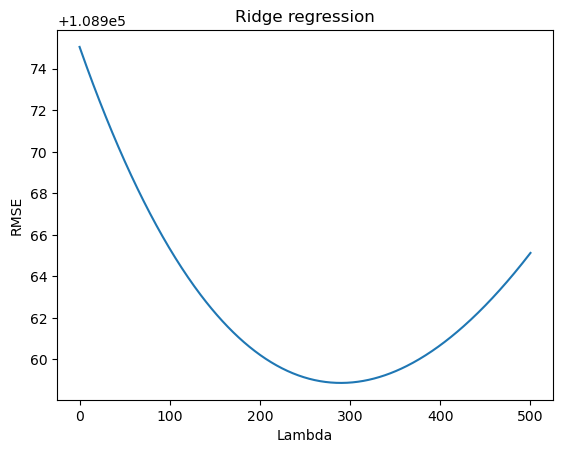

Optimal lambda: 289.57915831663325


In [127]:

X = df[factors]
scaled = StandardScaler().fit_transform(X)
scaled = pd.DataFrame(scaled, columns=X.columns)
xTrain, xTest, yTrain, yTest = train_test_split(scaled, y, test_size=0.2, random_state=0)
lambdas = np.linspace(0,500,500)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
my_lambda = lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]
print('Optimal lambda:',my_lambda)


In [128]:
def Ridge_regersion(X, y, random_state):
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=random_state)
    ridgeModel = Ridge(alpha=my_lambda).fit(xTrain, yTrain)
    rSqr = ridgeModel.score(xTest, yTest)
    y_hat = ridgeModel.predict(xTest)
    rmse = np.sqrt(mean_squared_error(yTest, y_hat))
    return rSqr, rmse
rsqrs = []
rmses = []

In [129]:
# for i in range(len(factors)):
#     xTrain, xTest, yTrain, yTest = train_test_split(scaled.drop(factors[i],axis=1), y, test_size=0.2, random_state=0)
#     lambdas = np.linspace(0,500,500)
#     cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
#     for ii in range(len(lambdas)):
#         ridgeModel = Ridge(alpha=my_lambda).fit(xTrain, yTrain)
#         cont[ii,0] = lambdas[ii]
#         error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
#         cont[ii,1] = error

#         rSqr = ridgeModel.score(xTest, yTest)
#         y_hat = ridgeModel.predict(xTest)
#         rmse = np.sqrt(mean_squared_error(yTest, y_hat))

#     plt.plot(cont[:,0],cont[:,1])
#     plt.xlabel('Lambda')
#     plt.ylabel('RMSE')
#     plt.title('Ridge regression')
#     plt.show()
#     print(f'Optimal lambda of {factors[i]}:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])
#     rsqrs = []
#     rmses = []
for i in range(len(factors)):
    for random_state in range(100):
        temp1, temp2 = Ridge_regersion(scaled.drop(factors[i],axis=1),y, random_state)
        rsqrs.append(temp1)
        rmses.append(temp2)
    print(f'The r^2 after dropping {factors[i]} is {np.mean(list(rsqrs)):.3f}')
    print(np.mean(list(rmses)))
    rsqrs = []
    rmses = []

The r^2 after dropping GPA is 0.245
115328.31015086864
The r^2 after dropping SAT is 0.233
116232.50494141925
The r^2 after dropping Age is 0.245
115324.27006714355
The r^2 after dropping yearsatcompany is 0.243
115492.56604288632
The r^2 after dropping Height is 0.245
115331.9566684218
The r^2 after dropping Zodiac is 0.245
115337.68518341266
The r^2 after dropping yearsofexperience is 0.169
120943.4958383126


In [130]:
for random_state in range(100):
    temp1, temp2 = Ridge_regersion(scaled,y, random_state)
    rsqrs.append(temp1)
    rmses.append(temp2)
print(f'The r^2 is {np.mean(list(rsqrs)):.3f}')
print(np.mean(list(rmses)))
rsqrs = []
rmses = []

The r^2 is 0.245
115333.43612677396


2. Using ridge regression to do the same as in 1): How does the model change or improve compared to OLS? What is the optimal lambda?

I did the same thing as the previous one, but instead of using linear regression model, I did a ridge regression model. To test which one is the best predictor, I drop each column separately to see the change in R^2 

We should be able to determine whether the model fits according to the value of the R^2

The optimal lambda is around 290. After finding the optimal lambda, I put all the predictors into the ridge regression model. The R^2 value did not change at all(0.245). The best predictor is also yearsofexperience. I dropped each predictor and put the rest 6 of them into the model, R^2 decreased significantly after dropping yearsofexperience, indicating the best predictor is yearsofexperience.

The reason that ridge regression model did not do a better job is that those columns have a very low colinearity or there are few features with high correlation, for example SAT and GPA have some correlation. 

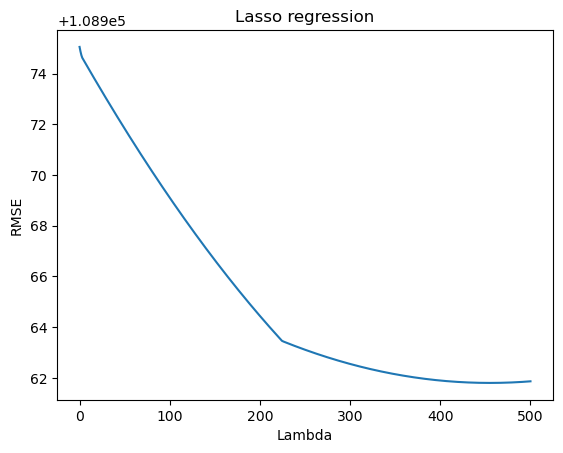

Optimal lambda: 454.9098196392785


In [131]:
import warnings
warnings.filterwarnings('ignore') # Just to ignore warnings that might be thrown due to artifically formed data.

# Load libraries:
from sklearn.linear_model import Lasso

# Init parameters:
xTrain, xTest, yTrain, yTest = train_test_split(scaled, y, test_size=0.2, random_state=0)
lambdas = np.linspace(0,500,500)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]

for ii in range(len(lambdas)):
    ridgeModel = Lasso(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
my_lasso = lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]
print('Optimal lambda:', my_lasso)

In [132]:
def Lasso_regersion(X, y, random_state):
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=random_state)
    lassoModel = Lasso(alpha=my_lasso).fit(xTrain, yTrain)
    rSqr = lassoModel.score(xTest, yTest)
    y_hat = lassoModel.predict(xTest)
    rmse = np.sqrt(mean_squared_error(yTest, y_hat))
    return rSqr, rmse
rsqrs = []
rmses = []

In [133]:
for i in range(len(factors)):
    for random_state in range(100):
        temp1, temp2 = Lasso_regersion(scaled.drop(factors[i],axis=1),y, random_state)
        rsqrs.append(temp1)
        rmses.append(temp2)
    print(f'The r^2 after dropping {factors[i]} is {np.mean(list(rsqrs)):.3f}')
    print(np.mean(list(rmses)))
    rsqrs = []
    rmses = []

The r^2 after dropping GPA is 0.245
115320.89841055222
The r^2 after dropping SAT is 0.233
116224.80644611422
The r^2 after dropping Age is 0.245
115321.56987523581
The r^2 after dropping yearsatcompany is 0.243
115481.20195938097
The r^2 after dropping Height is 0.245
115320.6912035354
The r^2 after dropping Zodiac is 0.245
115326.85421501633
The r^2 after dropping yearsofexperience is 0.169
120940.13389621601


In [134]:
for random_state in range(100):
    temp1, temp2 = Lasso_regersion(scaled,y, random_state)
    rsqrs.append(temp1)
    rmses.append(temp2)
print(f'The r^2 is {np.mean(list(rsqrs)):.3f}')
print(np.mean(list(rmses)))
rsqrs = []
rmses = []

The r^2 is 0.245
115322.84023834989


3. Using Lasso regression to do the same as in 1): How does the model change now? How many of the predictor betas are shrunk to exactly 0? What is the optimal lambda now?

I did the same thing as I did in the first question, but put the predictors in a different model.

By the values of R^2, we will be able to determine if the values fit the model.

The values I got was very similar to what I got in question 2. It seems like the value of R^2 did not change much(0.245), the optimal lambda is roughly 455. And the best predictor is also yearsofexperience, since the value of R^2 varies the most after dropping yearsofexperience. The value of R^2 did not change much after dropping other values.

I guess the reason that Linear regression and Lasso regression can give similar values for R^2 is similar to my guass in question 2. Only few colunms have correlations

In [135]:
df

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,Male,...,0,0,0,Asian,PhD,45,68.891,9,1166,3.04
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,Male,...,1,0,0,Two Or More,Bachelor's Degree,24,61.454,12,1175,3.07
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,Male,...,0,0,0,Asian,Bachelor's Degree,25,65.455,1,1268,3.34
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,Male,...,0,0,0,Asian,Master's Degree,32,73.769,8,1070,2.75
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,Male,...,0,0,0,White,Bachelor's Degree,29,68.710,2,1187,3.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,Facebook,Software Engineering Manager,"Menlo Park, CA",1470000,290000,1100.0,80000.0,9.0,7.0,Male,...,0,0,0,Asian,Bachelor's Degree,31,68.402,12,1436,3.77
61982,Google,Product Manager,"San Francisco, CA",4500000,450000,3700.0,350000.0,20.0,14.0,Male,...,0,0,0,Asian,Master's Degree,57,69.195,6,1363,3.50
61984,Zapier,Software Engineering Manager,"Denver, CO",1605000,250000,1305.0,50000.0,16.0,2.0,Female,...,0,0,0,White,Master's Degree,55,66.902,11,1447,3.77
61987,Facebook,Software Engineering Manager,"Menlo Park, CA",2372000,315000,1933.0,124000.0,22.0,2.0,Male,...,0,1,0,Black,Master's Degree,50,62.691,8,1513,3.85


In [136]:
df['gender'] = df['gender'].replace('Male', 0)
df['gender'] = df['gender'].replace('Female', 1)
df = df[df['gender'] != 'Other']
df

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
15710,Google,Software Engineer,"Sunnyvale, CA",400000,210000,145000.0,45000.0,5.0,5.0,0,...,0,0,0,Asian,PhD,45,68.891,9,1166,3.04
23532,Microsoft,Software Engineer,"Redmond, WA",136000,124000,1000.0,11000.0,3.0,2.0,0,...,1,0,0,Two Or More,Bachelor's Degree,24,61.454,12,1175,3.07
23533,Google,Software Engineer,"San Bruno, CA",337000,177000,125000.0,36000.0,6.0,6.0,0,...,0,0,0,Asian,Bachelor's Degree,25,65.455,1,1268,3.34
23534,Microsoft,Software Engineer,"Seattle, WA",222000,164000,38000.0,20000.0,4.0,4.0,0,...,0,0,0,Asian,Master's Degree,32,73.769,8,1070,2.75
23535,Blend,Software Engineer,"San Francisco, CA",187000,165000,22000.0,0.0,5.0,0.0,0,...,0,0,0,White,Bachelor's Degree,29,68.710,2,1187,3.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,Facebook,Software Engineering Manager,"Menlo Park, CA",1470000,290000,1100.0,80000.0,9.0,7.0,0,...,0,0,0,Asian,Bachelor's Degree,31,68.402,12,1436,3.77
61982,Google,Product Manager,"San Francisco, CA",4500000,450000,3700.0,350000.0,20.0,14.0,0,...,0,0,0,Asian,Master's Degree,57,69.195,6,1363,3.50
61984,Zapier,Software Engineering Manager,"Denver, CO",1605000,250000,1305.0,50000.0,16.0,2.0,1,...,0,0,0,White,Master's Degree,55,66.902,11,1447,3.77
61987,Facebook,Software Engineering Manager,"Menlo Park, CA",2372000,315000,1933.0,124000.0,22.0,2.0,0,...,0,1,0,Black,Master's Degree,50,62.691,8,1513,3.85


In [137]:
factors = ['GPA', 'SAT', 'Age', 'yearsatcompany','Height','Zodiac','yearsofexperience','totalyearlycompensation','Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Race_Asian','Race_White','Race_Black','Race_Hispanic']
X = df[factors]
X,y

(        GPA   SAT  Age  yearsatcompany  Height  Zodiac  yearsofexperience  \
 15710  3.04  1166   45             5.0  68.891       9                5.0   
 23532  3.07  1175   24             2.0  61.454      12                3.0   
 23533  3.34  1268   25             6.0  65.455       1                6.0   
 23534  2.75  1070   32             4.0  73.769       8                4.0   
 23535  3.23  1187   29             0.0  68.710       2                5.0   
 ...     ...   ...  ...             ...     ...     ...                ...   
 61981  3.77  1436   31             7.0  68.402      12                9.0   
 61982  3.50  1363   57            14.0  69.195       6               20.0   
 61984  3.77  1447   55             2.0  66.902      11               16.0   
 61987  3.85  1513   50             2.0  62.691       8               22.0   
 61991  3.48  1362   49             0.0  65.138       2               17.0   
 
        totalyearlycompensation  Masters_Degree  Bachelors_Deg

In [138]:
scaled = StandardScaler().fit_transform(X)
scaled = pd.DataFrame(scaled, columns=X.columns)

In [139]:
y = df['gender'].apply(lambda x: int(x))
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 21483 entries, 15710 to 61991
Series name: gender
Non-Null Count  Dtype
--------------  -----
21483 non-null  int64
dtypes: int64(1)
memory usage: 335.7 KB


In [140]:
from sklearn import metrics
from sklearn import model_selection
def logistic_regersion(X, y, random_state):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = LogisticRegression(class_weight='balanced').fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(metrics.classification_report(y_test, y_pred))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    print(f'accuracy = {100 * accuracy:0.4f}%')
    print(f'precision = {100 * precision:0.4f}%')
    print(f'recall = {recall:0.4f}')
    print(f'f1 = {f1:0.4f}')
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
    auc_roc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1])
    plt.legend(loc="lower right")
    plt.show()
    return model
    # X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    # model1 = LogisticRegression(class_weight = 'balanced').fit(X_train, y_train)
    # y_pred = model1.predict(X_test)
    # print(metrics.classification_report(y_test, y_pred))
    # accuracy = metrics.accuracy_score(y_test, y_pred)
    # precision = metrics.precision_score(y_test, y_pred)
    # recall = metrics.recall_score(y_test, y_pred)
    # f1 = metrics.f1_score(y_test, y_pred)
    # print(f'accuracy = {100 * accuracy:0.4f}%')
    # print(f'precision = {100 * precision:0.4f}%')
    # print(f'recall = {recall:0.4f}')
    # print(f'f1 = {f1:0.4f}')
    # k = 10
    # splitter = model_selection.KFold(k)

    # # Compute cross-validation scores.
    # cv_scores1 = model_selection.cross_val_score(model1, X_train, y_train, cv = splitter)
    # cv_scores2 = model_selection.cross_val_score(model2, X_train2, y_train, cv = splitter)

    # # Print the means of the scores.
    # print("Model 1 CV score = ", np.mean(cv_scores1))
    # print("Model 2 CV score = ", np.mean(cv_scores2))


              precision    recall  f1-score   support

           0       0.86      0.45      0.59      3534
           1       0.20      0.66      0.31       763

    accuracy                           0.49      4297
   macro avg       0.53      0.55      0.45      4297
weighted avg       0.74      0.49      0.54      4297

accuracy = 48.6386%
precision = 20.4824%
recall = 0.6566
f1 = 0.3122


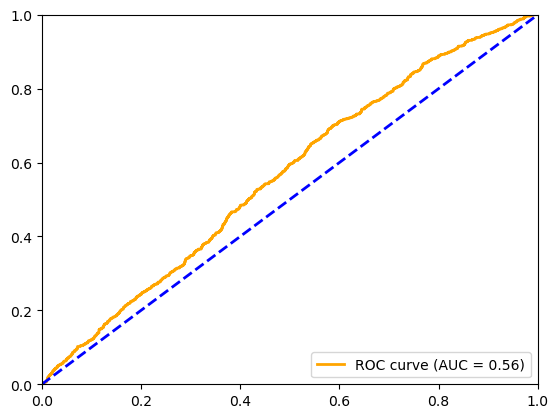

              precision    recall  f1-score   support

           0       0.84      0.42      0.56      3534
           1       0.19      0.63      0.29       763

    accuracy                           0.45      4297
   macro avg       0.51      0.52      0.42      4297
weighted avg       0.72      0.45      0.51      4297

accuracy = 45.4038%
precision = 18.8263%
recall = 0.6265
f1 = 0.2895


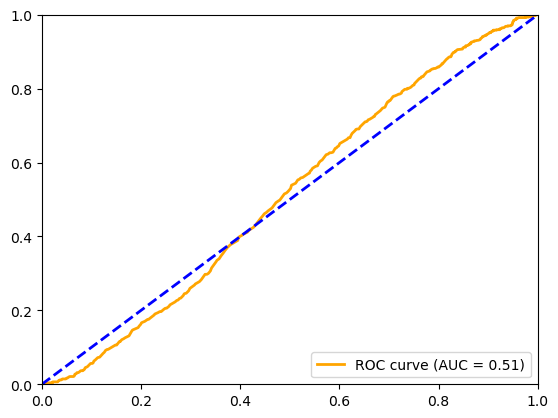

In [141]:
model1 = logistic_regersion(scaled, y, random_state)
model2 = logistic_regersion(scaled[['totalyearlycompensation']], y, random_state)

In [142]:
coefs = pd.DataFrame(model1.coef_.flatten(), index=scaled.columns)
coefs

,0
GPA,0.027666
SAT,-0.020260
Age,-0.009667
yearsatcompany,-0.064094
Height,0.019203
Zodiac,-0.001494
yearsofexperience,-0.109407
totalyearlycompensation,-0.056703
Masters_Degree,0.301934
Bachelors_Degree,0.251221


In [143]:
print(f"Beta coefficient of totalyearlycompensation in model 1 is {model1.coef_[0][0]:.3f}")
print(f"Beta coefficient of totalyearlycompensation in model 2 is {model2.coef_[0][0]:.3f}")

Beta coefficient of totalyearlycompensation in model 1 is 0.028
Beta coefficient of totalyearlycompensation in model 2 is -0.122


              precision    recall  f1-score   support

           0       0.86      0.44      0.58      3513
           1       0.21      0.68      0.32       784

    accuracy                           0.48      4297
   macro avg       0.53      0.56      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 47.9637%
precision = 21.1217%
recall = 0.6773
f1 = 0.3220


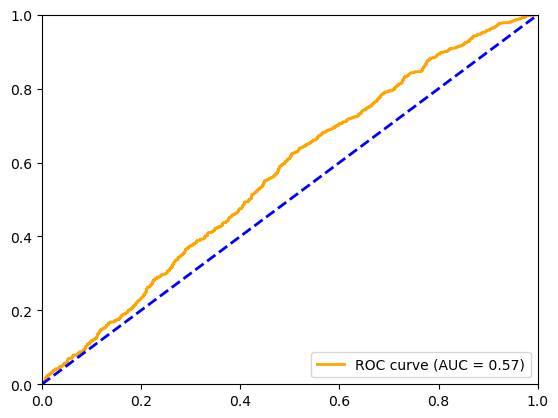

              precision    recall  f1-score   support

           0       0.86      0.43      0.58      3513
           1       0.21      0.68      0.32       784

    accuracy                           0.48      4297
   macro avg       0.53      0.56      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 47.8241%
precision = 21.0944%
recall = 0.6786
f1 = 0.3218


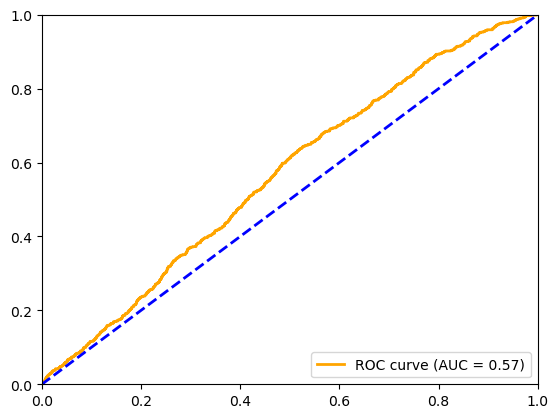

              precision    recall  f1-score   support

           0       0.86      0.43      0.58      3513
           1       0.21      0.67      0.32       784

    accuracy                           0.48      4297
   macro avg       0.53      0.55      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 47.8241%
precision = 21.0024%
recall = 0.6735
f1 = 0.3202


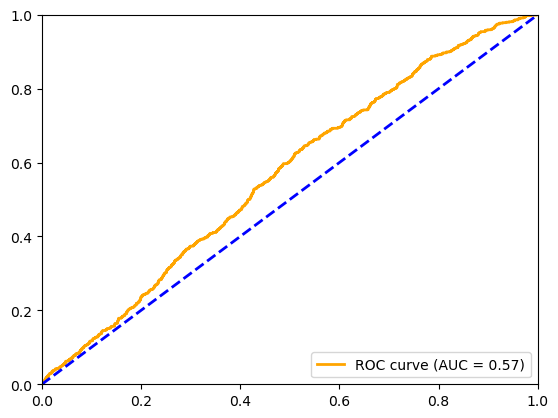

              precision    recall  f1-score   support

           0       0.86      0.44      0.58      3513
           1       0.21      0.67      0.32       784

    accuracy                           0.48      4297
   macro avg       0.53      0.56      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 48.1964%
precision = 21.0906%
recall = 0.6709
f1 = 0.3209


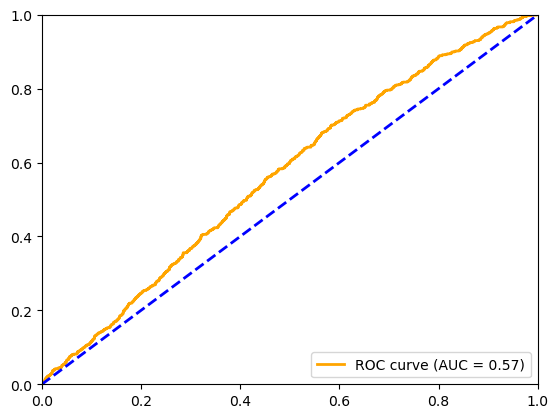

              precision    recall  f1-score   support

           0       0.86      0.44      0.58      3513
           1       0.21      0.67      0.32       784

    accuracy                           0.48      4297
   macro avg       0.53      0.55      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 48.1033%
precision = 21.0104%
recall = 0.6684
f1 = 0.3197


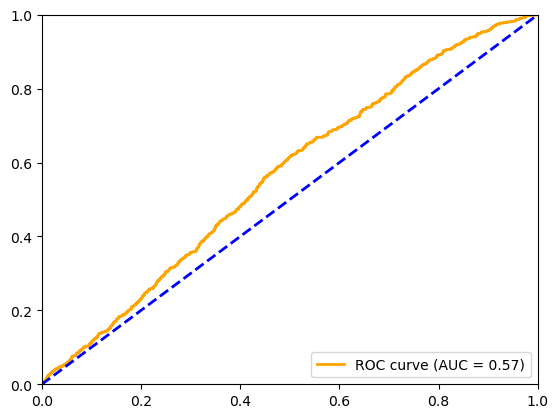

              precision    recall  f1-score   support

           0       0.86      0.43      0.58      3513
           1       0.21      0.68      0.32       784

    accuracy                           0.48      4297
   macro avg       0.53      0.55      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 47.7542%
precision = 21.0234%
recall = 0.6760
f1 = 0.3207


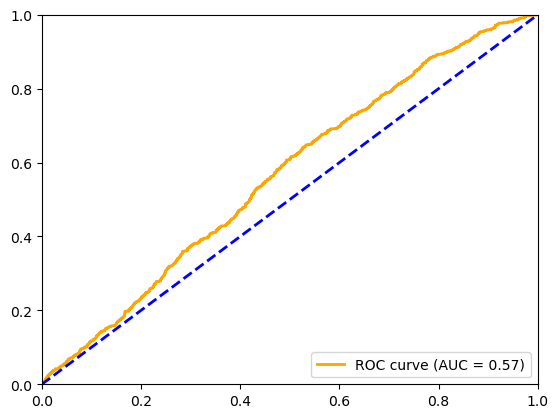

              precision    recall  f1-score   support

           0       0.84      0.43      0.57      3513
           1       0.20      0.64      0.31       784

    accuracy                           0.47      4297
   macro avg       0.52      0.54      0.44      4297
weighted avg       0.73      0.47      0.52      4297

accuracy = 47.0794%
precision = 20.1761%
recall = 0.6429
f1 = 0.3071


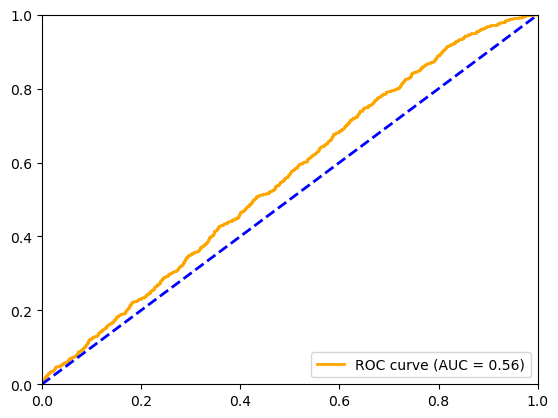

              precision    recall  f1-score   support

           0       0.86      0.43      0.58      3513
           1       0.21      0.68      0.32       784

    accuracy                           0.48      4297
   macro avg       0.54      0.56      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 47.9870%
precision = 21.2217%
recall = 0.6824
f1 = 0.3238


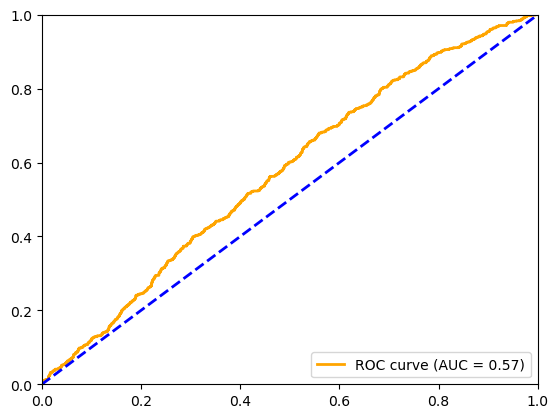

              precision    recall  f1-score   support

           0       0.85      0.43      0.58      3513
           1       0.21      0.67      0.32       784

    accuracy                           0.48      4297
   macro avg       0.53      0.55      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 47.7077%
precision = 20.8914%
recall = 0.6696
f1 = 0.3185


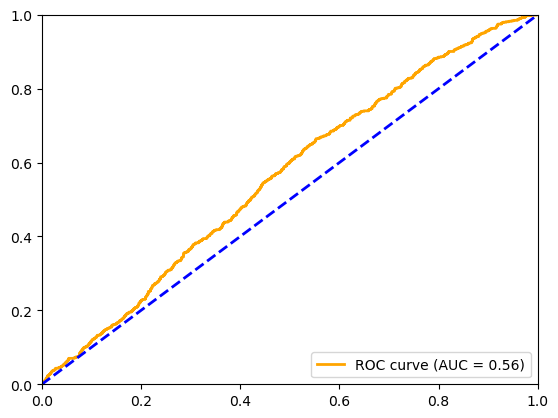

              precision    recall  f1-score   support

           0       0.86      0.44      0.58      3513
           1       0.21      0.67      0.32       784

    accuracy                           0.48      4297
   macro avg       0.53      0.55      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 48.0102%
precision = 20.9768%
recall = 0.6684
f1 = 0.3193


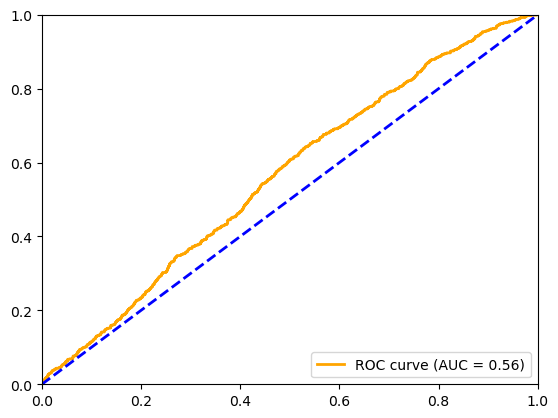

              precision    recall  f1-score   support

           0       0.86      0.43      0.58      3513
           1       0.21      0.67      0.32       784

    accuracy                           0.48      4297
   macro avg       0.53      0.55      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 47.7775%
precision = 21.0087%
recall = 0.6747
f1 = 0.3204


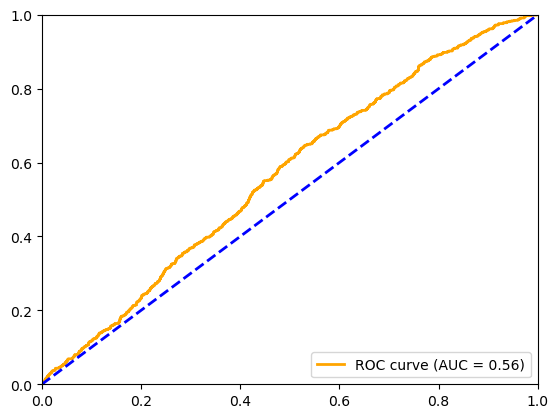

              precision    recall  f1-score   support

           0       0.86      0.43      0.58      3513
           1       0.21      0.67      0.32       784

    accuracy                           0.48      4297
   macro avg       0.53      0.55      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 47.7542%
precision = 20.9312%
recall = 0.6709
f1 = 0.3191


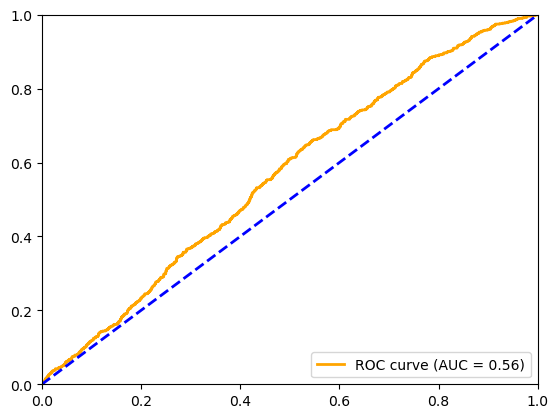

              precision    recall  f1-score   support

           0       0.85      0.43      0.57      3513
           1       0.21      0.67      0.32       784

    accuracy                           0.47      4297
   macro avg       0.53      0.55      0.44      4297
weighted avg       0.73      0.47      0.52      4297

accuracy = 47.1259%
precision = 20.6856%
recall = 0.6696
f1 = 0.3161


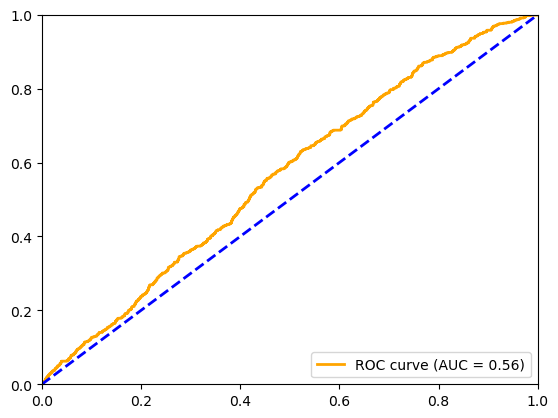

              precision    recall  f1-score   support

           0       0.85      0.43      0.57      3513
           1       0.21      0.67      0.32       784

    accuracy                           0.47      4297
   macro avg       0.53      0.55      0.44      4297
weighted avg       0.73      0.47      0.52      4297

accuracy = 47.2423%
precision = 20.6801%
recall = 0.6671
f1 = 0.3157


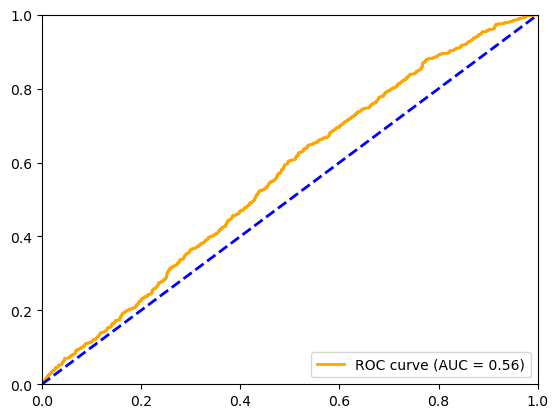

              precision    recall  f1-score   support

           0       0.86      0.43      0.57      3513
           1       0.21      0.67      0.32       784

    accuracy                           0.48      4297
   macro avg       0.53      0.55      0.45      4297
weighted avg       0.74      0.48      0.53      4297

accuracy = 47.6379%
precision = 20.9588%
recall = 0.6747
f1 = 0.3198


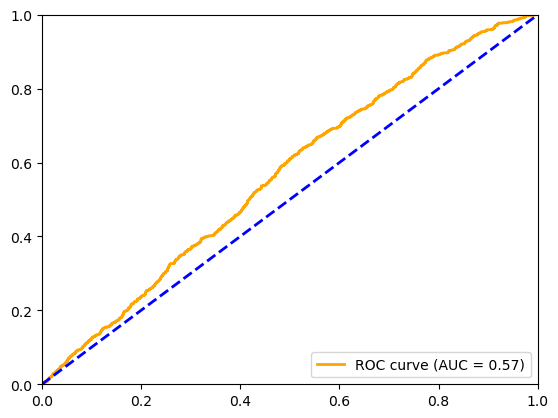

              precision    recall  f1-score   support

           0       0.86      0.43      0.57      3513
           1       0.21      0.68      0.32       784

    accuracy                           0.47      4297
   macro avg       0.53      0.55      0.44      4297
weighted avg       0.74      0.47      0.52      4297

accuracy = 47.2423%
precision = 20.8644%
recall = 0.6773
f1 = 0.3190


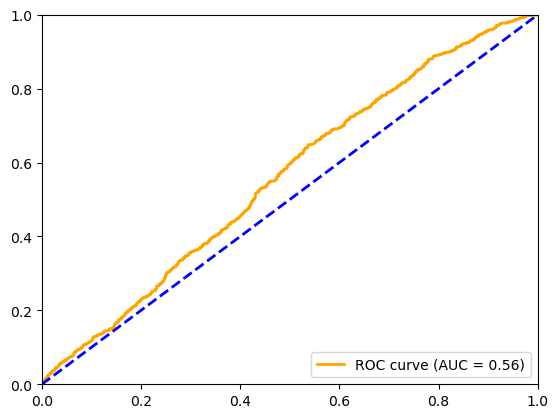

In [144]:
for i in range(len(factors)):
    logistic_regersion(scaled.drop(factors[i],axis=1),y, 1)


4. There is controversy as to the existence of a male/female gender pay gap in tech job compensation. Build a logistic regression model (with gender as the outcome variable) to see if there is an appreciable beta associated with total annual compensation with and without controlling for other factors.

I put 16 predictors into the model. For education, I exclude 'Some College'. For race, I exclude 'Race_Two_Or_More'

The ROC curve, accuracy and other variables can determine if the values fit the model

The result shows that the Beta coefficient for total annual compensation in model 1 and model 2 are also very small. accuracy are round 50%
and precision is 20%

The values showed that values did not fit the model very much. Maybe we should normalize data or we drop too much data

In [145]:
predictor = ['yearsofexperience','Height','GPA','Age','SAT']
df1 = df[predictor]
df1

,yearsofexperience,Height,GPA,Age,SAT
15710,5.0,68.891,3.04,45,1166
23532,3.0,61.454,3.07,24,1175
23533,6.0,65.455,3.34,25,1268
23534,4.0,73.769,2.75,32,1070
23535,5.0,68.710,3.23,29,1187
...,...,...,...,...,...
61981,9.0,68.402,3.77,31,1436
61982,20.0,69.195,3.50,57,1363
61984,16.0,66.902,3.77,55,1447
61987,22.0,62.691,3.85,50,1513


In [146]:
y = (df['totalyearlycompensation'] >= df['totalyearlycompensation'].median()).astype(int)
y

15710    1
23532    0
23533    1
23534    1
23535    1
        ..
61981    1
61982    1
61984    1
61987    1
61991    1
Name: totalyearlycompensation, Length: 21483, dtype: int64

              precision    recall  f1-score   support

           0       0.64      0.72      0.68      2205
           1       0.66      0.57      0.61      2092

    accuracy                           0.65      4297
   macro avg       0.65      0.65      0.65      4297
weighted avg       0.65      0.65      0.65      4297

accuracy = 64.9523%
precision = 66.1344%
recall = 0.5741
f1 = 0.6146


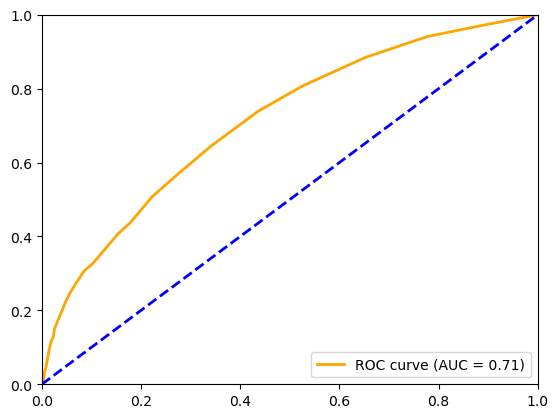

              precision    recall  f1-score   support

           0       0.59      0.61      0.60      2205
           1       0.57      0.56      0.57      2092

    accuracy                           0.58      4297
   macro avg       0.58      0.58      0.58      4297
weighted avg       0.58      0.58      0.58      4297

accuracy = 58.2965%
precision = 57.3529%
recall = 0.5593
f1 = 0.5663


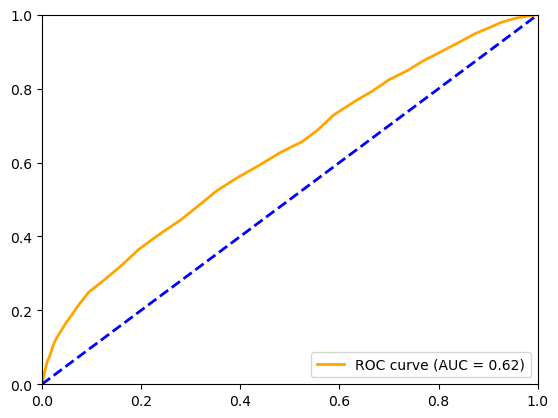

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      2205
           1       0.51      0.50      0.50      2092

    accuracy                           0.52      4297
   macro avg       0.52      0.52      0.52      4297
weighted avg       0.52      0.52      0.52      4297

accuracy = 51.8036%
precision = 50.5060%
recall = 0.5010
f1 = 0.5030


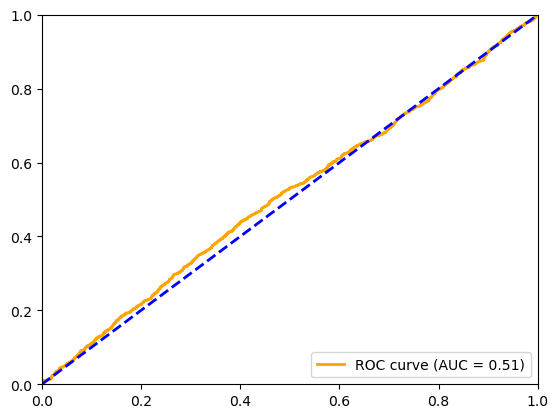

              precision    recall  f1-score   support

           0       0.62      0.55      0.58      2205
           1       0.58      0.65      0.61      2092

    accuracy                           0.60      4297
   macro avg       0.60      0.60      0.60      4297
weighted avg       0.60      0.60      0.60      4297

accuracy = 59.5997%
precision = 57.5939%
recall = 0.6453
f1 = 0.6087


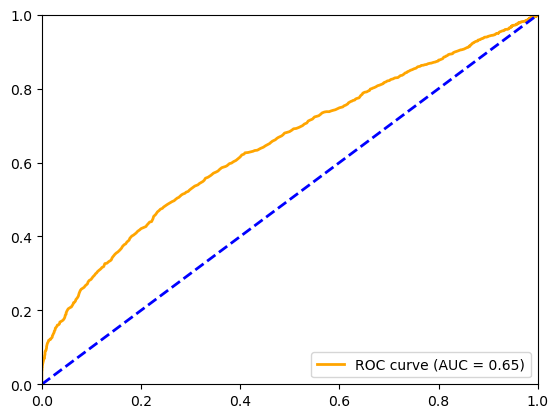

              precision    recall  f1-score   support

           0       0.60      0.56      0.58      2205
           1       0.57      0.62      0.59      2092

    accuracy                           0.59      4297
   macro avg       0.59      0.59      0.59      4297
weighted avg       0.59      0.59      0.59      4297

accuracy = 58.5292%
precision = 56.8222%
recall = 0.6171
f1 = 0.5917


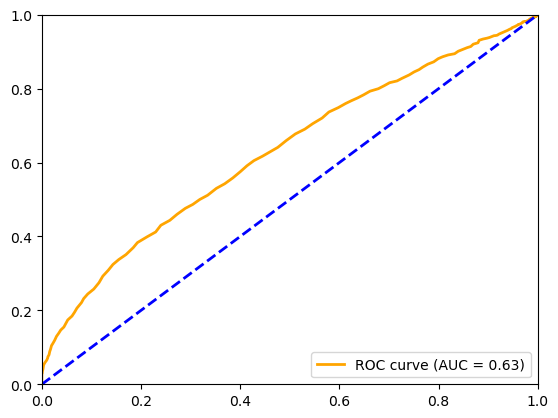

LogisticRegression(class_weight='balanced')

In [147]:
x_exp = scaled[['yearsofexperience']]
logistic_regersion(x_exp, y, 1)
x_age = scaled[['Age']]
logistic_regersion(x_age, y, 1)
x_height = scaled[['Height']]
logistic_regersion(x_height, y, 1)
x_sat = scaled[['SAT']]
logistic_regersion(x_sat, y, 1)
x_gpa = scaled[['GPA']]
logistic_regersion(x_gpa, y, 1)

5. Build a logistic regression model to see if you can predict high and low pay from years of relevant experience, age, height, SAT score and GPA, respectively.

I put yearsofexperience, Height, Age, SAT,GPA into the model to predictor the value of totalyearlycompensation.

ROC curve can determine if the model can predict high and low pay

From the data we can tell yearsofexperience has the highest AUC value (0.71) which means it is a good indicator to predict high and low pay

My guess is that the longer you are with the company, the higher your chances of promotion. So the salary package will be better

array([[<AxesSubplot:title={'center':'totalyearlycompensation'}>,
        <AxesSubplot:title={'center':'basesalary'}>,
        <AxesSubplot:title={'center':'stockgrantvalue'}>,
        <AxesSubplot:title={'center':'bonus'}>,
        <AxesSubplot:title={'center':'yearsofexperience'}>],
       [<AxesSubplot:title={'center':'yearsatcompany'}>,
        <AxesSubplot:title={'center':'Masters_Degree'}>,
        <AxesSubplot:title={'center':'Bachelors_Degree'}>,
        <AxesSubplot:title={'center':'Doctorate_Degree'}>,
        <AxesSubplot:title={'center':'Highschool'}>],
       [<AxesSubplot:title={'center':'Some_College'}>,
        <AxesSubplot:title={'center':'Race_Asian'}>,
        <AxesSubplot:title={'center':'Race_White'}>,
        <AxesSubplot:title={'center':'Race_Two_Or_More'}>,
        <AxesSubplot:title={'center':'Race_Black'}>],
       [<AxesSubplot:title={'center':'Race_Hispanic'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>,
   

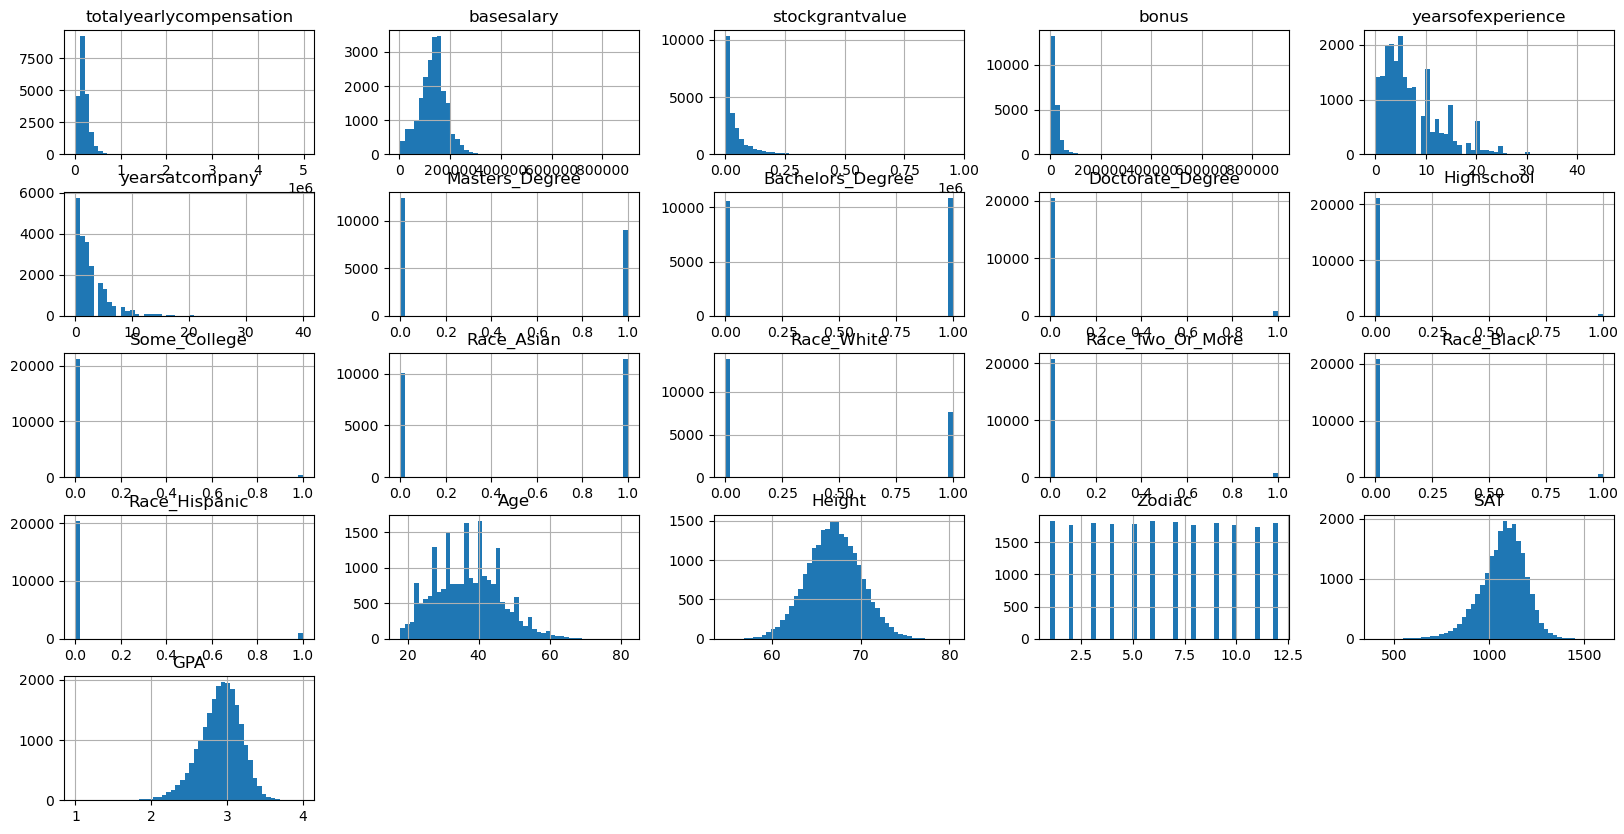

In [148]:
import scipy.stats as stats
df.hist(bins=50,figsize = (20,10))

In [149]:
data = ['Age', 'Height', 'totalyearlycompensation']
for col in data:
    s = stats.skew(df[col])
    k = stats.kurtosis(df[col])
    print(f'{col} has skewness of {s:.3f} and kurtosis of {k:.3f}')

Age has skewness of 0.309 and kurtosis of -0.162
Height has skewness of 0.000 and kurtosis of -0.011
totalyearlycompensation has skewness of 5.749 and kurtosis of 139.917


a) Is salary, height or age normally distributed? Does this surprise you? Why or why not?

For each column, I called skew and kurtosis on data in each column to check if it follows normal distribution.

The reason I use skew and kurtosis to check if it is a normal distribution is skewness is a measure of the asymmetry of a distribution. And Kurtosis is a measure of the "peakedness" or "flatness" of a distribution. A normal distribution is symmetric, meaning that the left and right tails are exactly the same, resulting in a skewness of zero. The kurtosis of a normal distribution is 3, which is called "mesokurtic." This means that the distribution is neither too peaked nor too flat, and it has the same kurtosis as the standard normal distribution.

According to the data, Age and height have a skewness less than 0.5, which is pretty normal, but the salary has a very high skewness(5.715). Age and height have kurtosis close to 0, but the salary has a kurtosis of 138.359. In conclusion, Age and Height are normal distributed, salary is not.

What surprised me was the Age is normal distributed. I thought the company would prefer younger employees, so I am expecting the graph to be skewed to the left. The salary did not surprise me, the distribution of wealth is very uneven. According to Wikipedia, half of the world's net wealth belongs to the top 1%, top 10% of adults hold 85%, while the bottom 90% hold the remaining 15% of the world's total wealth, top 30% of adults hold 97% of the total wealth.

In [150]:
factors = ['basesalary', 'stockgrantvalue', 'bonus']
X = df[factors]
y = df['totalyearlycompensation']
for random_state in range(100):
    temp1, temp2 = linear_regersion(X,y, random_state,'predictors', 'totalyearlycompensation')
    rsqrs.append(temp1)
    rmses.append(temp2)
print(f'r^2 is {np.mean(list(rsqrs)):.3f}')
print(np.mean(list(rmses)))
rsqrs = []
rmses = []

r^2 is 0.900
37631.77233878286


In [151]:
for random_state in range(100):
    temp1, temp2 = linear_regersion(df[['basesalary', 'stockgrantvalue']],y, random_state,'predictors', 'totalyearlycompensation')
    rsqrs.append(temp1)
    rmses.append(temp2)
print(f'r^2 is {np.mean(list(rsqrs)):.3f}')
print(np.mean(list(rmses)))
rsqrs = []
rmses = []
for random_state in range(100):
    temp1, temp2 = linear_regersion(df[['basesalary', 'bonus']],y, random_state,'predictors', 'totalyearlycompensation')
    rsqrs.append(temp1)
    rmses.append(temp2)
print(f'r^2 is {np.mean(list(rsqrs)):.3f}')
print(np.mean(list(rmses)))
rsqrs = []
rmses = []
for random_state in range(100):
    temp1, temp2 = linear_regersion(df[['bonus', 'stockgrantvalue']],y, random_state,'predictors', 'totalyearlycompensation')
    rsqrs.append(temp1)
    rmses.append(temp2)
print(f'r^2 is {np.mean(list(rsqrs)):.3f}')
print(np.mean(list(rmses)))
rsqrs = []
rmses = []

r^2 is 0.863
46873.27075861382
r^2 is 0.680
74892.73267628584
r^2 is 0.762
64299.363072314474


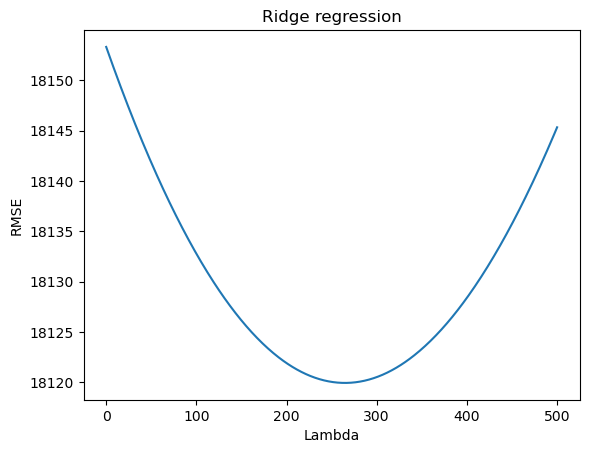

Optimal lambda: 264.5290581162324


In [152]:
X = df[factors]
scaled = StandardScaler().fit_transform(X)
scaled = pd.DataFrame(scaled, columns=X.columns)
xTrain, xTest, yTrain, yTest = train_test_split(scaled, y, test_size=0.2, random_state=0)
lambdas = np.linspace(0,500,500)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
my_lambda = lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]
print('Optimal lambda:',my_lambda)

In [153]:
factors = ['basesalary', 'stockgrantvalue', 'bonus']
X = df[factors]
scaled = StandardScaler().fit_transform(X)
scaled = pd.DataFrame(scaled, columns=X.columns)
for random_state in range(100):
    temp1, temp2 = Ridge_regersion(scaled,y, random_state)
    rsqrs.append(temp1)
    rmses.append(temp2)
print(f'The r^2 is {np.mean(list(rsqrs)):.3f}')
print(np.mean(list(rmses)))
rsqrs = []
rmses = []

The r^2 is 0.900
37616.43131450526


In [154]:
factors = ['basesalary', 'stockgrantvalue', 'bonus']
X = df[factors]
scaled = StandardScaler().fit_transform(X)
scaled = pd.DataFrame(scaled, columns=X.columns)
for i in range(len(factors)):
    for random_state in range(100):
        temp1, temp2 = Lasso_regersion(scaled.drop(factors[i],axis=1),y, random_state)
        rsqrs.append(temp1)
        rmses.append(temp2)
    print(f'The r^2 after dropping {factors[i]} is {np.mean(list(rsqrs)):.3f}')
    print(np.mean(list(rmses)))
    rsqrs = []
    rmses = []

The r^2 after dropping basesalary is 0.762
64289.59664822276
The r^2 after dropping stockgrantvalue is 0.680
74885.16757921169
The r^2 after dropping bonus is 0.863
46866.587868377734


b) Tell us something interesting about this dataset that is not already covered by the questions above and that is not obvious.

I used Base salary, Value of stock grants, and Bonus payments to predict the totalyearlycompensation, I put them into all 2 models.

I want to see how well can those predictor be

The result show they are all good predictor, and they have the same r^2 value(0.9) even I put them into different model. And value for R^2 after dropping each value are the same.

The reason I guess is both model evaluate their performance on new data and consider other metrics such as mean squared error, cross-validation scores. 

Also in this file, we did not use location, title as predictor, maybe values will be more fitable after using them